## Consumer Price Index (CPI) & Harmonised Index of Consumer Prices (HICP)

### UK Inflation: 2020 August to 2022 August

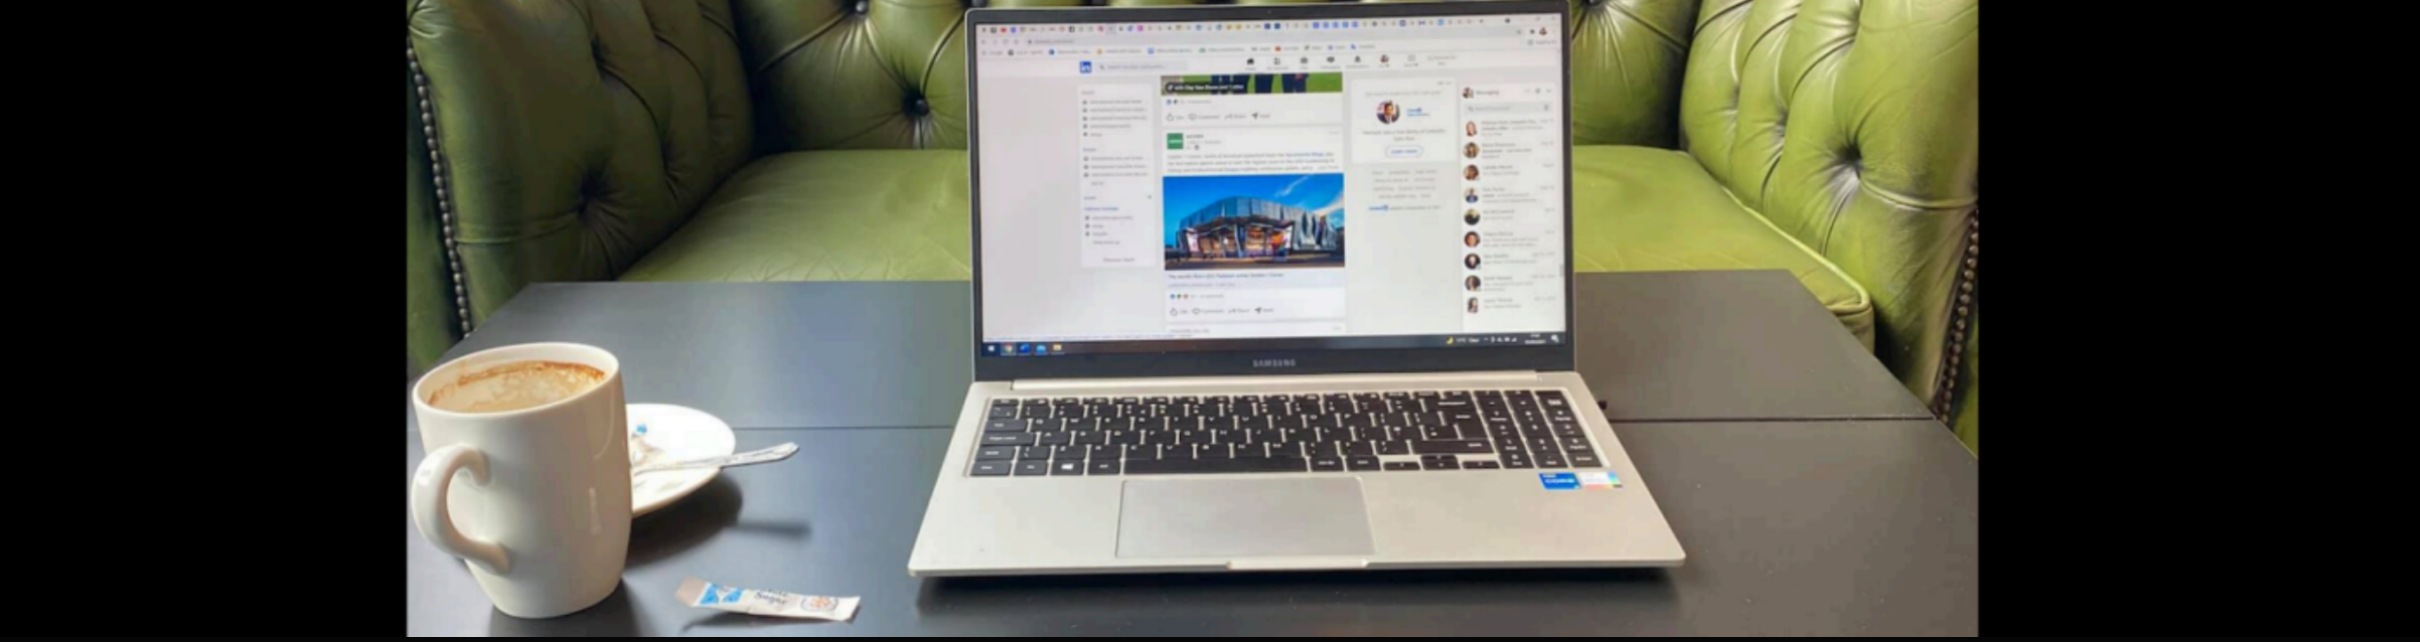

### Inflation: CPI, CPIH, & HICP

**Inflation** is a fundamental economic concept that measures the rate at which the general price level of goods and services rises, leading to a decrease in the purchasing power of a currency. In other words, it represents the percentage increase in the average prices of a basket of goods and services over time. Inflation is a crucial indicator of an economy's health and stability.

<div style="background-color: navy; padding: 10px;">
<h3>Consumer Price Index (CPI):</h3>
</div>

The **Consumer Price Index (CPI)** is one of the most commonly used measures of inflation. It calculates the average change in prices paid by consumers for a fixed basket of goods and services over time. The formula for CPI is as follows:

$$
CPI = \frac{Cost\ of\ Basket\ in\ Current\ Year}{Cost\ of\ Basket\ in\ Base\ Year} \times 100
$$

Where:
- *Cost of Basket in Current Year* represents the total cost of goods and services in the current year.
- *Cost of Basket in Base Year* represents the total cost of goods and services in the base year.

<div style="background-color: navy; padding: 10px;">
<h3>Consumer Price Index Including Owner Occupiers' Housing Costs (CPIH):</h3>
</div>

**CPIH** is an extension of the CPI that includes owner occupiers' housing costs. It provides a more comprehensive measure of inflation by considering housing-related expenses, such as mortgage interest payments and council tax. The formula for CPIH remains the same as the CPI.

<div style="background-color: navy; padding: 10px;">
<h3>Harmonized Index of Consumer Prices (HICP): </h3>
</div>

The **Harmonized Index of Consumer Prices (HICP)** is an inflation measure used in the European Union. It standardizes the calculation of inflation across EU member states for international comparison. The formula for HICP is similar to CPI:

$$
HICP = \frac{Cost\ of\ Harmonized\ Basket\ in\ Current\ Year}{Cost\ of\ Harmonized\ Basket\ in\ Base\ Year} \times 100
$$

Where:
- *Cost of Harmonized Basket in Current Year* represents the total cost of a standardized basket of goods and services in the current year.
- *Cost of Harmonized Basket in Base Year* represents the total cost of the same standardized basket in the base year.

Understanding these inflation measures is essential for policymakers, economists, and investors to make informed decisions regarding economic trends and monetary policies. Each index has its own strengths and weaknesses, and their application depends on the specific economic context and data availability.

### 1. LOADING LIBRARIES

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET

In [216]:
#loading data
goodAndServices = pd.read_csv(r'goodAndServices.csv')
housingRelatedCost = pd.read_csv(r'housingRelatedCost.csv')
cpi_n_hicp = pd.read_csv(r'consumer_price_index_And_Harmonized_indices_of_consumer_prices.csv')
transportaion_n_cpih = pd.read_csv(r'transportaion_and_cpih.csv')
cpih_and_foods = pd.read_csv(r'cpih_and_foods.csv')

## 3. CONSUMER PRICE INDEX (CPI)

In [217]:
#printing top five rows
goodAndServices[:5]

,Date,Food and non-alcoholic beverages,Alcohol and tobacco,Clothing and footwear,Housing and household services,Furniture and household goods,Transport,Recreation and culture,Restaurants and hotels,Other goods and services,CPIH 12-month inflation rate
0,Aug-20,0.04,0.06,-0.06,0.20,0.03,-0.10,0.35,-0.27,0.25,0.5
1,Sep-20,0.00,0.07,-0.07,0.20,-0.02,0.12,0.31,-0.07,0.20,0.7
2,Oct-20,0.05,0.06,0.00,0.16,0.02,0.16,0.26,-0.05,0.22,0.9
3,Nov-20,-0.03,0.06,-0.19,0.15,0.00,0.12,0.24,0.04,0.19,0.6
4,Dec-20,-0.11,0.11,-0.09,0.18,-0.03,0.23,0.35,0.01,0.17,0.8


The following categories represent components used to calculate the Consumer Price Index (CPI) or the Consumer Price Index including owner-occupiers' housing costs (CPIH). 

Each category reflects a specific type of expense or product group that plays a crucial role in measuring inflation.

1. **Food and non-alcoholic beverages:**  
   - Includes groceries and essential food items.
   
2. **Alcohol and tobacco:**  
   - Covers alcoholic beverages and tobacco products.
   
3. **Clothing and footwear:**  
   - Monitors prices of clothing, shoes, and apparel items.
   
4. **Housing and household services:**  
   - Encompasses housing-related expenses, including rent, mortgage interest, and home maintenance costs.
   
5. **Furniture and household goods:**  
   - Tracks changes in furniture, appliances, and household items' prices.
   
6. **Transport:**  
   - Represents transportation-related expenses, including vehicles, fuel, public transportation, and maintenance.
   
7. **Recreation and culture:**  
   - Covers leisure activities, entertainment, and cultural events like movie tickets and recreational products.
   
8. **Restaurants and hotels:**  
   - Reflects dining out and accommodation services, such as restaurant meals and hotel stays.
   
9. **Other goods and services:**  
   - A miscellaneous category for various expenses that don't fit into other categories.
   
10. **CPIH 12-month inflation rate:**  
    - Represents the overall 12-month inflation rate, summarizing how the cost of living has changed on average over a year.


In [295]:
#checking columns
goodAndServices.columns

Index(['Food and non-alcoholic beverages', 'Alcohol and tobacco',
       'Clothing and footwear', 'Housing and household services',
       'Furniture and household goods', 'Transport', 'Recreation and culture',
       'Restaurants and hotels', 'Other goods and services',
       'CPIH 12-month inflation rate', 'CPIH Python'],
      dtype='object')

In [296]:
#checking data types
goodAndServices.dtypes

Food and non-alcoholic beverages    float64
Alcohol and tobacco                 float64
Clothing and footwear               float64
Housing and household services      float64
Furniture and household goods       float64
Transport                           float64
Recreation and culture              float64
Restaurants and hotels              float64
Other goods and services            float64
CPIH 12-month inflation rate        float64
CPIH Python                         float64
dtype: object

In [219]:
#summing all columns exlcuding 'Date' and 'CPIH 12-month inflation rate' for verifying inflation
goodAndServices['CPIH Python'] = goodAndServices[['Food and non-alcoholic beverages', 'Alcohol and tobacco',
       'Clothing and footwear', 'Housing and household services',
       'Furniture and household goods', 'Transport', 'Recreation and culture',
       'Restaurants and hotels', 'Other goods and services']].sum(axis=1)

In [294]:
#printing top five rows
goodAndServices.head(5)

,Food and non-alcoholic beverages,Alcohol and tobacco,Clothing and footwear,Housing and household services,Furniture and household goods,Transport,Recreation and culture,Restaurants and hotels,Other goods and services,CPIH 12-month inflation rate,CPIH Python
Date,,,,,,,,,,,
Aug-20,0.04,0.06,-0.06,0.20,0.03,-0.10,0.35,-0.27,0.25,0.5,0.50
Sep-20,0.00,0.07,-0.07,0.20,-0.02,0.12,0.31,-0.07,0.20,0.7,0.74
Oct-20,0.05,0.06,0.00,0.16,0.02,0.16,0.26,-0.05,0.22,0.9,0.88
Nov-20,-0.03,0.06,-0.19,0.15,0.00,0.12,0.24,0.04,0.19,0.6,0.58
Dec-20,-0.11,0.11,-0.09,0.18,-0.03,0.23,0.35,0.01,0.17,0.8,0.82


In [292]:
#printing bottom five columns
goodAndServices.tail(5)

,Food and non-alcoholic beverages,Alcohol and tobacco,Clothing and footwear,Housing and household services,Furniture and household goods,Transport,Recreation and culture,Restaurants and hotels,Other goods and services,CPIH 12-month inflation rate,CPIH Python
Date,,,,,,,,,,,
Apr-22,0.61,0.17,0.48,2.76,0.57,1.47,0.64,0.64,0.44,7.8,7.78
May-22,0.78,0.19,0.40,2.79,0.60,1.50,0.54,0.64,0.44,7.9,7.88
Jun-22,0.89,0.18,0.35,2.82,0.59,1.64,0.52,0.73,0.46,8.2,8.18
Jul-22,1.15,0.20,0.39,2.91,0.56,1.66,0.60,0.78,0.52,8.8,8.77
Aug-22,1.20,0.21,0.43,2.90,0.58,1.36,0.57,0.79,0.58,8.6,8.62


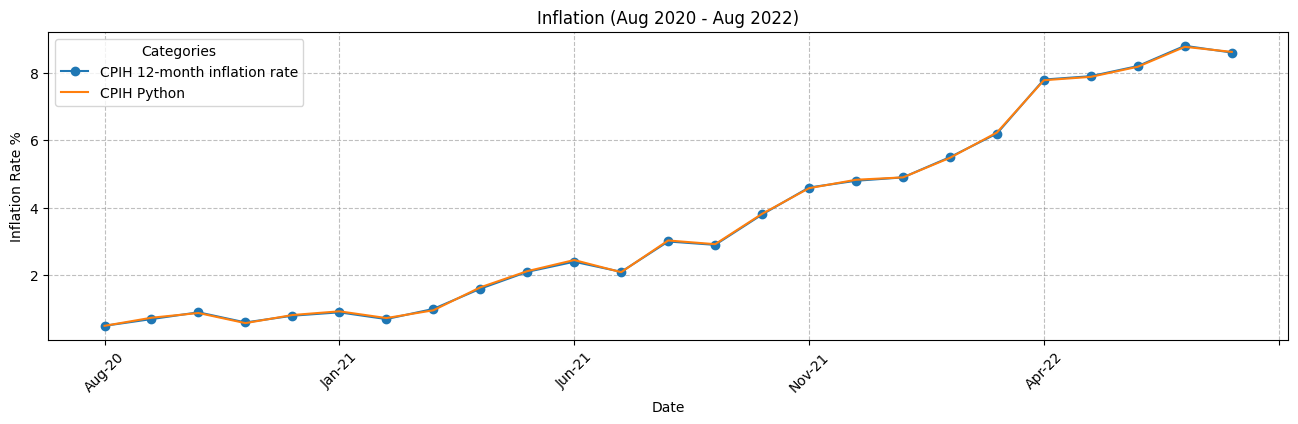

In [297]:
fig, ax = plt.subplots(figsize=(16, 4))
goodAndServices['CPIH 12-month inflation rate'].plot(marker='o')
goodAndServices['CPIH Python'].plot()
ax.set_title("Inflation (Aug 2020 - Aug 2022)")
ax.set_xlabel("Date")
ax.set_ylabel("Inflation Rate %")
ax.legend(title="Categories")
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.xticks(rotation=45)
plt.show()

In [222]:
#setting data columns to index
goodAndServices.set_index('Date', inplace=True)

In [223]:
#creating index
goodAndServices.index

Index(['Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21',
       'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21',
       'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22',
       'May-22', 'Jun-22', 'Jul-22', 'Aug-22'],
      dtype='object', name='Date')

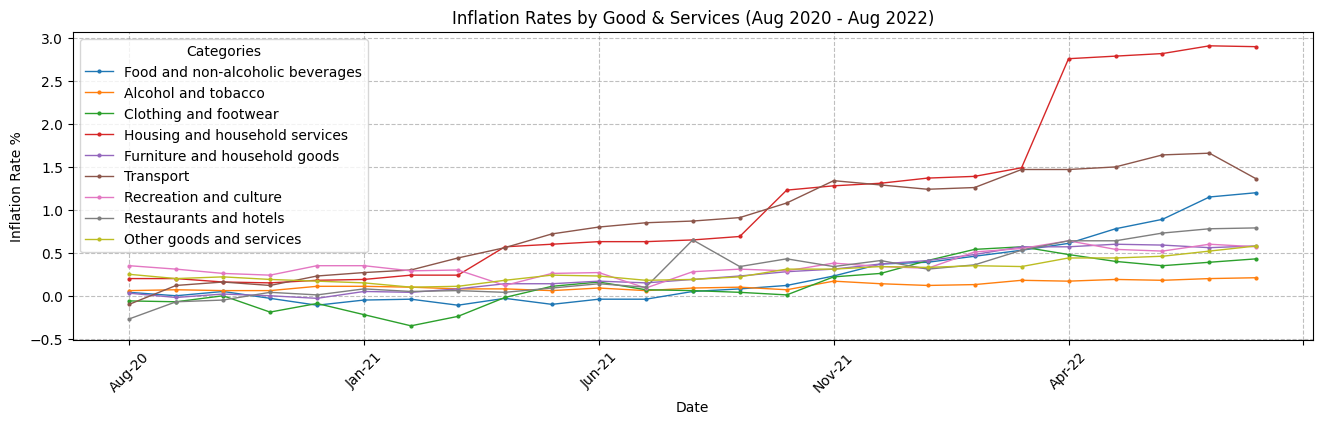

In [298]:
#plotting good and services inflation rate between, Aug 2020 - 2022
fig, ax = plt.subplots(figsize=(16, 4))
columns_to_exclude = ['Date', 'CPIH 12-month inflation rate', 'CPIH Python']
columns_to_include = [col for col in goodAndServices.columns if col not in columns_to_exclude]
goodAndServices[columns_to_include].plot(ax=ax, marker='o', markersize=2, linewidth=1)
ax.set_title("Inflation Rates by Good & Services (Aug 2020 - Aug 2022)")
ax.set_xlabel("Date")
ax.set_ylabel("Inflation Rate %")
ax.legend(title="Categories")
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.xticks(rotation=45)
plt.show()

### Contributions to the Annual CPIH Inflation Rate
*UK, August 2020 to August 2022*

The correlation matrix provides insights into how different categories of goods and services have contributed to the overall annual CPIH inflation rate over the past two years. These contributions are essential for understanding the factors driving inflation by breaking it down into its individual components. When combined, these contributions from various divisions sum up to the overall CPIH inflation rate, for instance, 8.6% in August 2022.

#### Key Highlights:
- **Largest Upward Contributions:** In August 2022, the most significant upward contributions to the annual CPIH inflation rate came from:
    - **Housing and Household Services** (2.90 percentage points): Primarily attributed to electricity, gas, and other fuels, and owner occupiers' housing costs.
    - **Transport** (1.36 percentage points): Mainly from motor fuels.
    - **Food and Non-Alcoholic Beverages** (1.20 percentage points).

- **Combined Impact:** The contributions from these three divisions accounted for 5.46 percentage points, which is nearly two-thirds of the annual CPIH inflation rate.

- **Weight in CPIH Basket:** Their combined weight in the CPIH basket is 51.8%.

- **Notable Milestones:** The contributions from **Food and Non-Alcoholic Beverages (1.20 percentage points)** and **Restaurants and Hotels (0.79 percentage points)** are the largest since the start of the National Statistic series in 2006.


In [300]:
goodAndServices.corr()

,Food and non-alcoholic beverages,Alcohol and tobacco,Clothing and footwear,Housing and household services,Furniture and household goods,Transport,Recreation and culture,Restaurants and hotels,Other goods and services,CPIH 12-month inflation rate,CPIH Python
Food and non-alcoholic beverages,1.000000,0.889195,0.779746,0.947176,0.897115,0.792384,0.834361,0.837812,0.956606,0.945588,0.945228
Alcohol and tobacco,0.889195,1.000000,0.736746,0.875201,0.865256,0.807390,0.862226,0.818580,0.825330,0.896639,0.897067
Clothing and footwear,0.779746,0.736746,1.000000,0.807063,0.907791,0.863366,0.700178,0.733194,0.839256,0.875029,0.875560
Housing and household services,0.947176,0.875201,0.807063,1.000000,0.943510,0.883886,0.806009,0.888216,0.946710,0.983273,0.982911
Furniture and household goods,0.897115,0.865256,0.907791,0.943510,1.000000,0.949820,0.786952,0.890826,0.895384,0.979513,0.979692
Transport,0.792384,0.807390,0.863366,0.883886,0.949820,1.000000,0.644965,0.902151,0.806448,0.934974,0.935422
Recreation and culture,0.834361,0.862226,0.700178,0.806009,0.786952,0.644965,1.000000,0.706617,0.806090,0.817665,0.816983
Restaurants and hotels,0.837812,0.818580,0.733194,0.888216,0.890826,0.902151,0.706617,1.000000,0.806326,0.920568,0.921461
Other goods and services,0.956606,0.825330,0.839256,0.946710,0.895384,0.806448,0.806090,0.806326,1.000000,0.943228,0.943155
CPIH 12-month inflation rate,0.945588,0.896639,0.875029,0.983273,0.979513,0.934974,0.817665,0.920568,0.943228,1.000000,0.999962


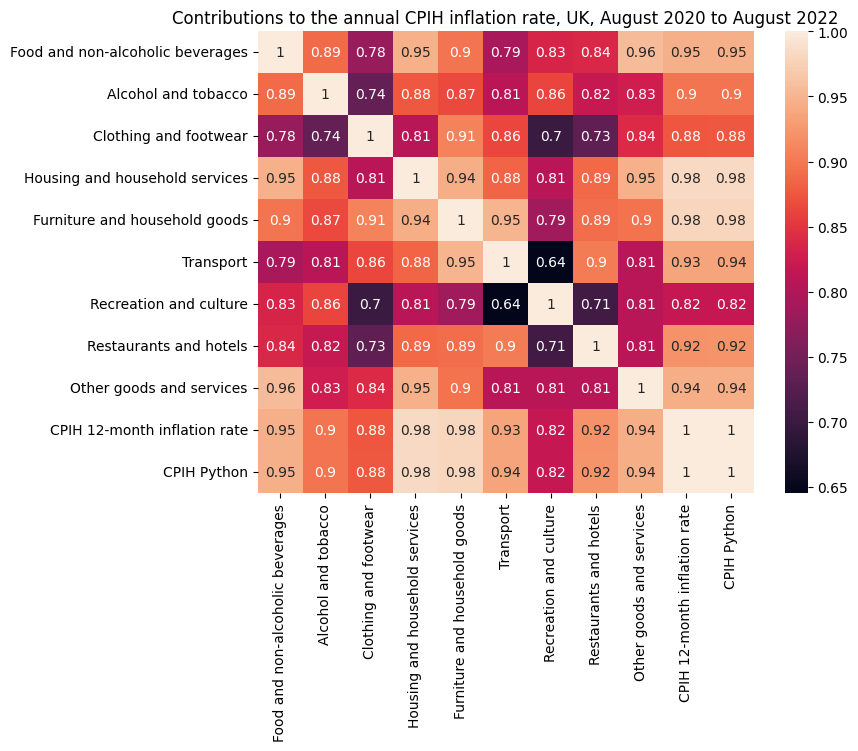

In [299]:
plt.figure(figsize=(8,6))
sns.heatmap(goodAndServices.corr(), annot=True)
plt.title("Contributions to the annual CPIH inflation rate, UK, August 2020 to August 2022")
plt.show()

### Correlation Matrix

This correlation matrix illustrates the degree of correlation between various categories of goods and services. Each cell in the matrix contains a correlation coefficient, indicating the strength and direction of the relationship between the corresponding categories.

- **Food and non-alcoholic beverages:** This category has a strong positive correlation with most other categories, including alcohol and tobacco, housing and household services, furniture and household goods, and other goods and services. This suggests that changes in the prices of food and non-alcoholic beverages are positively associated with changes in these categories.

- **Alcohol and tobacco:** This category also exhibits strong positive correlations with various categories, indicating that it is positively linked to changes in other categories like housing, furniture, and other goods and services.

- **Clothing and footwear:** This category has positive correlations with several categories, particularly with housing and household services, furniture and household goods, and other goods and services.

- **Housing and household services:** This category shows strong positive correlations with most categories, suggesting that changes in housing and household services are positively associated with changes in other categories.

- **Furniture and household goods:** Similar to housing, this category exhibits strong positive correlations with other categories.

- **Recreation and culture:** This category has relatively weaker correlations with other categories, with the strongest link to restaurants and hotels.

- **Restaurants and hotels:** This category is positively correlated with several others, including housing, furniture, and other goods and services.

- **Other goods and services:** This category demonstrates positive correlations with most other categories, particularly with food and non-alcoholic beverages, housing, and furniture.

- **CPIH 12-month inflation rate:** This column represents the Consumer Prices Index including owner-occupiers' housing costs (CPIH) 12-month inflation rate. It shows strong positive correlations with most categories, especially housing and household services, furniture, and other goods and services.


### 4. HOUSING RELATED COST

In [226]:
housingRelatedCost[:5]

,Date,Regular maintenance and repair,"Electricity, gas and other fuels",Water and sewerage,Council Tax,Rents,Owner occupiers housing costs
0,Jan-15,0.0,-0.08,0.02,0.02,0.15,0.32
1,Feb-15,0.0,-0.09,0.02,0.02,0.16,0.32
2,Mar-15,0.0,-0.12,0.02,0.02,0.16,0.33
3,Apr-15,0.0,-0.11,-0.01,0.03,0.15,0.31
4,May-15,0.0,-0.11,-0.01,0.03,0.16,0.31


- **Regular maintenance and repair**: This column contains data related to expenses associated with regular maintenance and repair activities.

- **Electricity, gas, and other fuels**: This column provides information about costs associated with electricity, gas, and other energy sources.

- **Water and sewerage**: This column represents expenses related to water supply and sewerage services.

- **Council Tax**: Council tax is a local taxation system in the UK. This column shows the associated tax amounts.

- **Rents**: This column contains data regarding rental costs.

- **Owner occupiers housing costs**: These are the costs associated with housing for individuals who own and occupy their homes.


In [227]:
housingRelatedCost.set_index('Date', inplace=True)

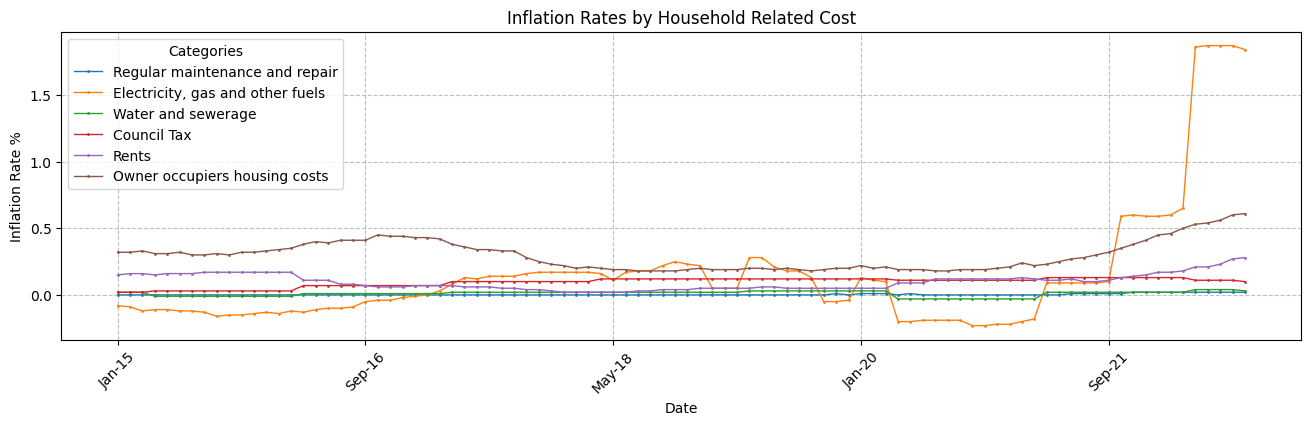

In [288]:
fig, ax = plt.subplots(figsize=(16,4))
housingRelatedCost.plot(ax=ax, marker='o', lw=1, ms=1)
ax.set_title("Inflation Rates by Household Related Cost")
ax.set_xlabel("Date")
ax.set_ylabel("Inflation Rate %")
ax.legend(title="Categories")
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.xticks(rotation=45)
plt.show()

### Contributions of Housing Components to Annual CPIH Inflation Rate
*UK, January 2015 to August 2022*

The Consumer Prices Index (CPI) and CPIH (Consumer Prices Index including owner-occupiers' housing costs) differ in that CPI excludes owner-occupiers' housing costs and Council Tax. In this context, we explore the contribution of these components to the annual CPIH inflation rate.

#### Key Insights
- In August 2022, the total contribution of housing and household services to the annual CPIH inflation rate was 2.90 percentage points. This figure remained relatively stable, only slightly decreasing from 2.91 percentage points in July. Notably, the July contribution was the highest recorded in the National Statistic series, which commenced in January 2006.

- The substantial contribution since April 2022 primarily stems from "electricity, gas, and other fuels." This reflects price increases for gas and electricity following the Office of Gas and Electricity Markets (Ofgem) cap adjustment on energy prices. These price hikes were initiated on April 1, 2022, and were preceded by an earlier increase in the price cap on October 1, 2021. Specifically, electricity prices surged by 54.0%, and gas prices soared by 95.7% in the 12 months leading up to August 2022. This led to a substantial contribution of 1.84 percentage points to the annual inflation rate from electricity, gas, and other fuels in total. Another adjustment to the Ofgem energy price cap is scheduled for October 2022.

- The contribution of owner occupiers' housing costs (OOH) to the CPIH annual inflation rate saw a slight rise from 0.60 to 0.61 percentage points between July and August 2022, increasing the annual rate by 0.01 percentage points. This increase is due to rising costs, with a 0.3% increase in August 2022 compared to a smaller 0.2% rise in the same period a year earlier.

- Council Tax made a contribution of 0.10 percentage points to the annual rate in August 2022, reflecting an annual rate of 3.4%. In April 2022, a non-repayable Council Tax rebate payment of £150 was extended to all households liable for Council Tax in Bands A to D in England. Additional funding was also provided for households requiring support but not eligible for the rebate, as well as for non-England households administered by the devolved countries. It's important to note that this rebate fell outside the scope of CPIH and was not factored into the figures.



In [303]:
housingRelatedCost.corr()

,Regular maintenance and repair,"Electricity, gas and other fuels",Water and sewerage,Council Tax,Rents,Owner occupiers housing costs
Regular maintenance and repair,1.000000,0.764117,0.373582,0.365160,0.526423,0.555308
"Electricity, gas and other fuels",0.764117,1.000000,0.578694,0.317939,0.434066,0.589464
Water and sewerage,0.373582,0.578694,1.000000,0.345905,-0.215585,0.246827
Council Tax,0.365160,0.317939,0.345905,1.000000,-0.375052,-0.285221
Rents,0.526423,0.434066,-0.215585,-0.375052,1.000000,0.621776
Owner occupiers housing costs,0.555308,0.589464,0.246827,-0.285221,0.621776,1.000000


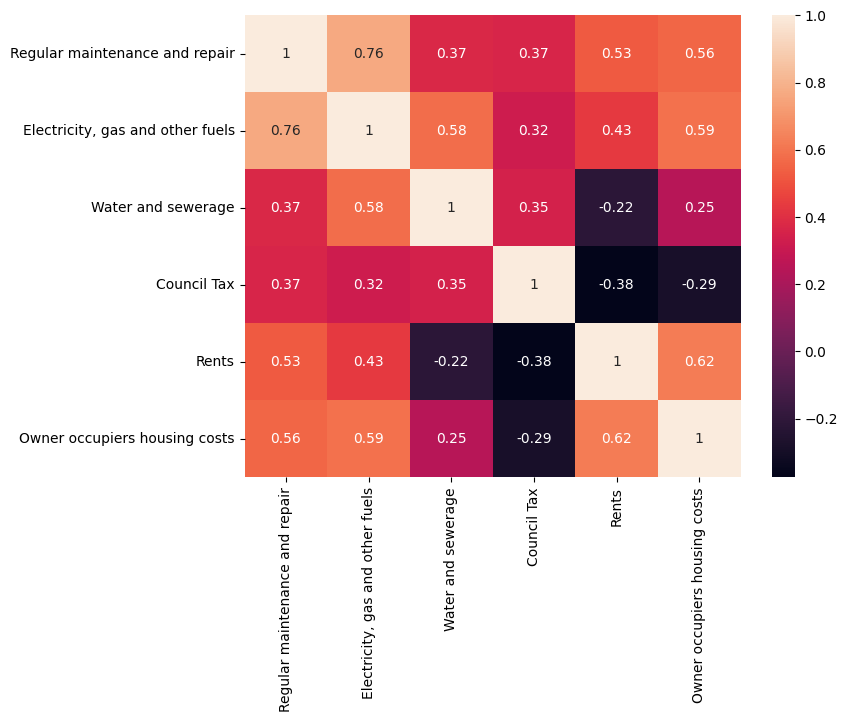

In [302]:
plt.figure(figsize=(8,6))
sns.heatmap(housingRelatedCost.corr(), annot=True)
plt.show()

### Correlation Matrix: Housing-Related Expenses

- **Regular Maintenance and Repair** shows a positive correlation with other housing-related expenses, indicating that when maintenance costs increase, other housing costs often tend to increase as well. The highest positive correlation is with "Owner Occupiers' Housing Costs" (0.555).

- **Electricity, Gas, and Other Fuels** are moderately correlated with other housing costs, suggesting that fluctuations in energy expenses may influence other housing costs. The highest correlation is with "Owner Occupiers' Housing Costs" (0.589).

- **Water and Sewerage** have a low to moderate positive correlation with some housing expenses, but notably, it has a negative correlation with "Rents" and "Council Tax." This suggests that when water and sewerage costs increase, rents and council taxes may decrease, and vice versa.

- **Council Tax** shows a mixed correlation, with positive correlations with maintenance, electricity, and gas expenses, but a negative correlation with water and sewerage, suggesting an inverse relationship.

- **Rents** exhibit a positive correlation with maintenance and repair costs, electricity, and gas expenses. Still, it has a negative correlation with water and sewerage, council tax, and owner occupiers' housing costs. This means that when rents go up, other housing costs may not necessarily follow the same trend.

- **Owner Occupiers' Housing Costs** are positively correlated with all other housing-related expenses. This indicates a general upward trend; when owner occupiers' housing costs increase, other housing costs tend to rise as well. The highest correlation is with "Electricity, Gas, and Other Fuels" (0.589).


### 5. CPI & HICP 

In [230]:
cpi_n_hicp[:5]

,Date,CPI (UK),France,Germany,Italy,US - HICP,US - CPI(U)
0,Aug-12,2.5,2.4,2.3,3.4,1.7,1.7
1,Sep-12,2.2,2.2,2.2,3.4,2.0,2.0
2,Oct-12,2.7,2.1,2.1,2.8,2.2,2.2
3,Nov-12,2.7,1.6,1.9,2.6,1.7,1.8
4,Dec-12,2.7,1.5,2.1,2.6,1.7,1.7


- **CPI (UK)**: This column contains the Consumer Price Index for the United Kingdom (UK). The Consumer Price Index measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.

- **France**: This column represents the Consumer Price Index for France, which measures changes in the price levels of goods and services purchased by households in France.

- **Germany**: This column represents the Consumer Price Index for Germany, indicating changes in the price levels of consumer goods and services in Germany.

- **Italy**: This column contains the Consumer Price Index for Italy, measuring changes in the prices of goods and services in Italy.

- **US - HICP**: This column represents the Harmonized Index of Consumer Prices (HICP) for the United States. The HICP is used to measure inflation and price stability within the European Union.

- **US - CPI(U)**: This column represents the Consumer Price Index for All Urban Consumers (CPI-U) in the United States. The CPI-U measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.


In [231]:
cpi_n_hicp.set_index('Date', inplace=True)

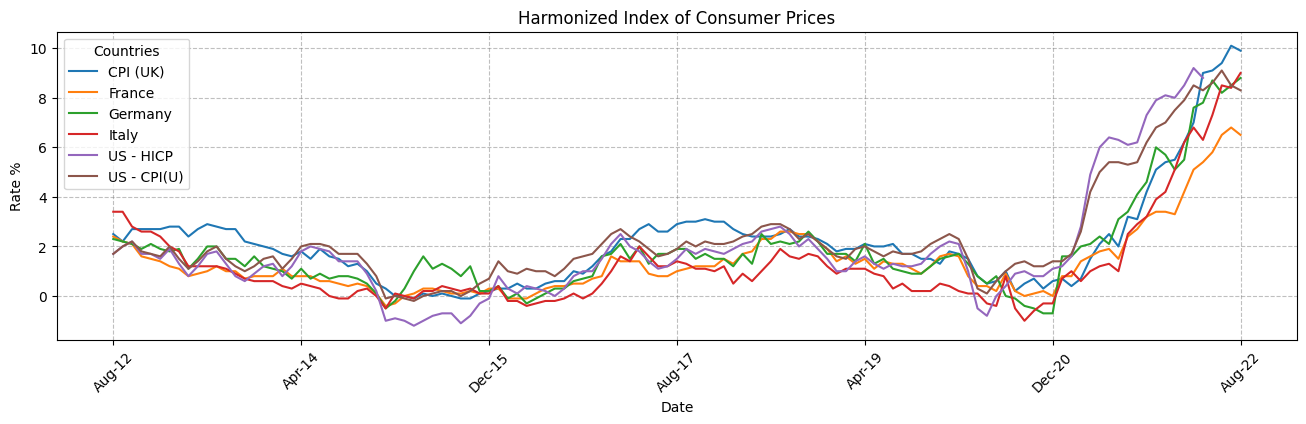

In [287]:
fig, ax = plt.subplots(figsize=(16,4))
cpi_n_hicp.plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Rate %")
ax.set_title('Harmonized Index of Consumer Prices')
ax.legend(title="Countries")
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.xticks(rotation=45)
plt.show()

### Data Disclaimer and Comparisons

**France, Germany, and Italy Estimates (August 2022):**
- The inflation estimates for August 2022 in France, Germany, and Italy are flash estimates. These estimates are preliminary and not final.
- The final Harmonized Index of Consumer Prices (HICP) data for August 2022 in these countries will be officially published on Friday, September 16, 2022.

**Note on International Comparisons:**
- It's important to note that there are certain differences in the definition and methodology of the United States HICP (Harmonized Index of Consumer Prices) compared to the European HICP. These differences may limit direct comparisons between the two indices.
- For more detailed information regarding the distinctions between the United States and European inflation indices, please refer to the document titled "Comparing the United States and European Inflation: The CPI and the HICP."

**United States CPI-U:**
- In the United States, the Consumer Price Index for All Urban Consumers (CPI-U) is used to provide a monthly measure of inflation. However, it's essential to understand that the CPI-U's coverage and methodology differ notably from that of the European HICP.


In [305]:
cpi_n_hicp.corr()

,CPI (UK),France,Germany,Italy,US - HICP,US - CPI(U)
CPI (UK),1.000000,0.938338,0.934608,0.941501,0.819559,0.885478
France,0.938338,1.000000,0.955005,0.944457,0.861932,0.911227
Germany,0.934608,0.955005,1.000000,0.952279,0.868885,0.917677
Italy,0.941501,0.944457,0.952279,1.000000,0.797834,0.870642
US - HICP,0.819559,0.861932,0.868885,0.797834,1.000000,0.994713
US - CPI(U),0.885478,0.911227,0.917677,0.870642,0.994713,1.000000


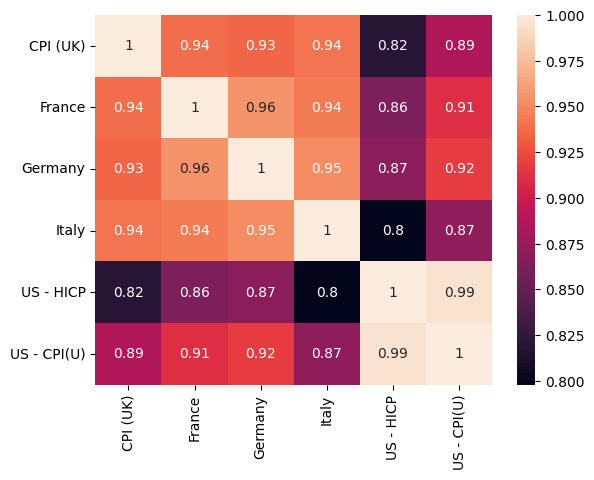

In [304]:
sns.heatmap(cpi_n_hicp.corr(), annot=True)
plt.show()

### Correlation Matrix: Inflation Rates Across Countries

The correlation matrix represents the degree of correlation between the inflation rates of different countries, including the United Kingdom (CPI), France, Germany, Italy, the United States (HICP), and the United States (CPI-U). Correlation values range from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

- **CPI (UK)** has strong positive correlations with other countries' inflation rates, ranging from approximately 0.934 to 0.941. This suggests that the UK's inflation rate is positively related to the inflation rates of these countries. The highest correlation is with Italy (0.941).

- **France, Germany, and Italy** have strong positive correlations among themselves, indicating that these European countries' inflation rates tend to move together. For instance, the correlation between France and Germany is about 0.955.

- **US - HICP** (United States - Harmonized Index of Consumer Prices) and **US - CPI(U)** (United States - Consumer Price Index for All Urban Consumers) have a strong positive correlation of approximately 0.994. This suggests that both U.S. inflation measures move in sync, which is expected.

#### Implications
Understanding these correlations is vital for economic analysis and forecasting. High positive correlations among countries may indicate a shared economic environment or similar external factors influencing inflation. For instance, if one country experiences a rise in inflation due to global oil price increases, the countries with high positive correlations are likely to see similar effects on their inflation rates.


### 6. CPIH, TRANSPORTATION & MOTOR FUELS

In [234]:
transportaion_n_cpih[:5]

,Date,CPIH,Transport,Motor fuels
0,Aug-12,2.3,1.8,-0.1
1,Sep-12,2.1,2.6,2.8
2,Oct-12,2.4,3.1,2.4
3,Nov-12,2.4,2.7,1.0
4,Dec-12,2.4,1.2,-0.2


- **CPIH**: This column contains the Consumer Prices Index including owner-occupiers' housing costs (CPIH) for the United Kingdom. The CPIH measures changes in the average prices paid by consumers for a wide range of goods and services, including housing costs for owner-occupiers.

- **Transport**: This column represents the rate of inflation for the "Transport" category. It includes changes in the prices of various transportation-related expenses.

- **Motor fuels**: This column contains the rate of inflation for "Motor fuels," which includes changes in the prices of fuels used for motor vehicles, such as gasoline and diesel.

In [235]:
transportaion_n_cpih.set_index('Date', inplace=True)

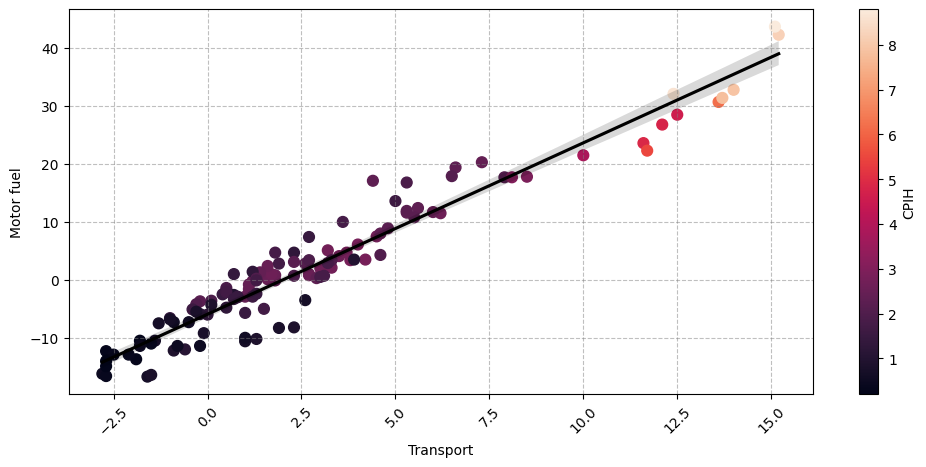

In [236]:
plt.figure(figsize=(12, 5))
colors = transportaion_n_cpih['CPIH']
cmap = plt.get_cmap('rocket')
scatter = plt.scatter(transportaion_n_cpih['Transport'], transportaion_n_cpih['Motor fuels'], c=colors, cmap=cmap, s=60)
cbar = plt.colorbar(scatter)
cbar.set_label('CPIH', fontsize=10)

sns.regplot(x='Transport', y='Motor fuels', data=transportaion_n_cpih, scatter=False, color='black')

plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.xlabel('Transport')
plt.ylabel('Motor fuel')
plt.xticks(rotation=45)
plt.show()

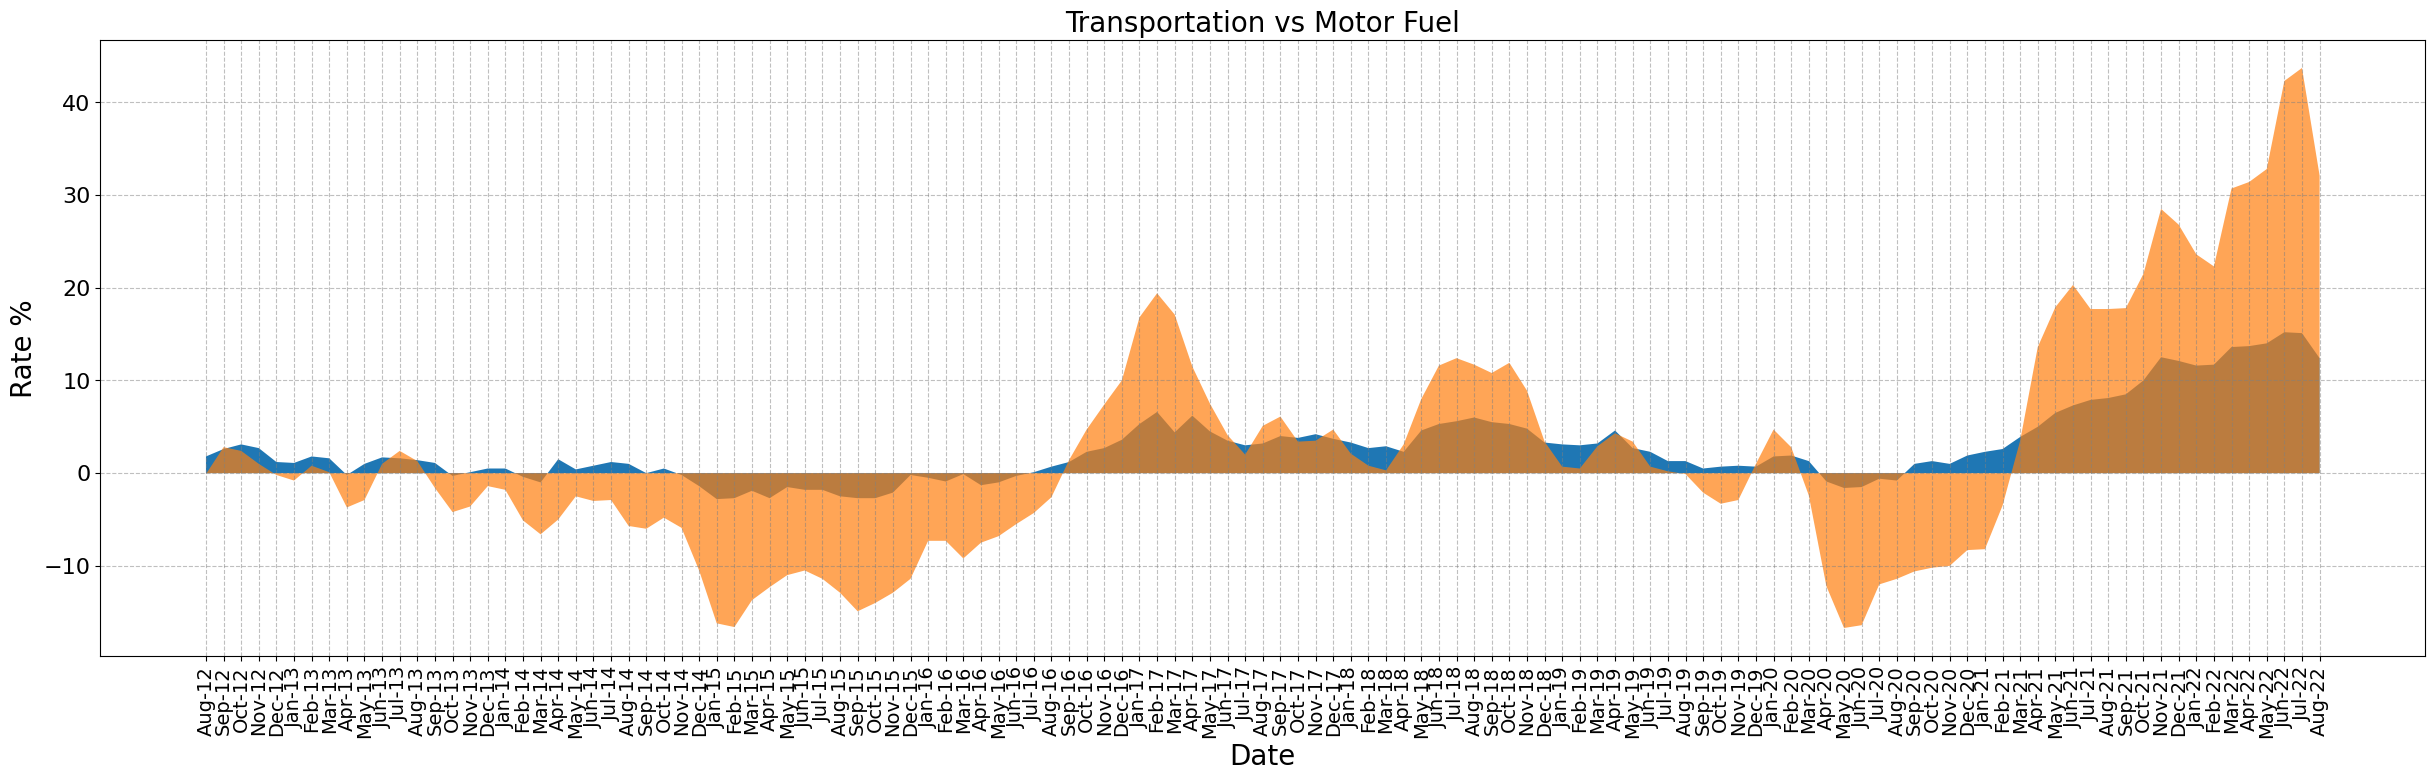

In [306]:
plt.figure(figsize=(30, 8))
plt.stackplot(transportaion_n_cpih.index, transportaion_n_cpih['Transport'])
plt.stackplot(transportaion_n_cpih.index, transportaion_n_cpih['Motor fuels'],alpha=0.7)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.title('Transportation vs Motor Fuel', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Rate %', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.show()

### Annual Inflation Rate for Transport

In August 2022, the annual inflation rate for transport was 12.4%, showing a decrease from 15.1% in July. This rate had experienced significant fluctuations, rising from minus 1.6% in May 2020 during the first COVID-19 lockdown to its peak at 15.2% in June 2022 before easing in the two most recent months.

**Motor Fuels Inflation Rate Eases**

- Within the transport category, motor fuel price changes play a pivotal role in driving overall movements. Fuel prices increased by 32.1% year-on-year in August 2022.
- The average prices for petrol and diesel stood at 175.2 and 186.6 pence per litre, respectively, in August 2022. This is in contrast to the prices of 134.6 and 137.0 pence per litre a year earlier.

**Annual Rate for Motor Fuels**

- The annual rate for motor fuels experienced a decrease from 43.7% to 32.1% between July and August 2022.
- This decrease is primarily attributed to a notable drop in petrol prices, which fell by 14.3 pence per litre between these two months. In contrast, a year ago, petrol prices rose by 2.0 pence per litre between July and August 2021. Diesel prices also contributed to the change in the rate, falling by 11.3 pence per litre this year compared to a 1.5 pence per litre increase a year ago.

**Other Transport Factors**

- In the broader transport division, second-hand car prices increased by 4.6% in the year to August 2022, a decline from 8.6% in July. This marks the fifth consecutive month of easing annual rates since March 2022 when the rate was at 31.0%.
- Much of the change in the annual inflation rate is attributed to a base effect as prices rose by over 18% between March and August 2021. During that period, there were reports of increased demand combined with restricted supply.


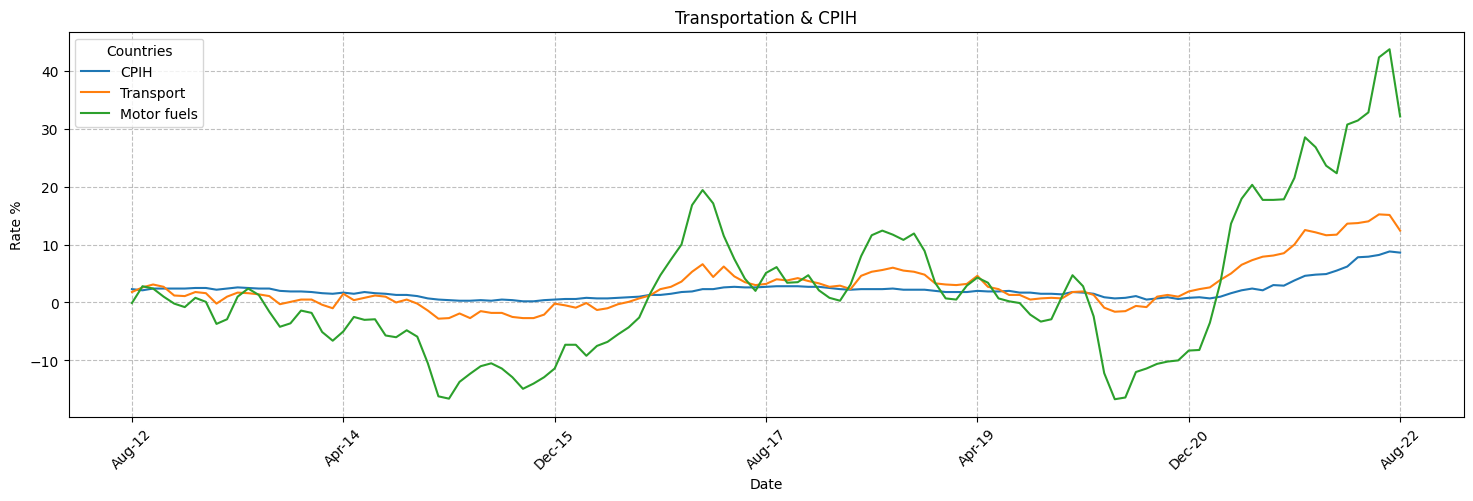

In [258]:
fig, ax = plt.subplots(figsize=(18,5))
transportaion_n_cpih.plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Rate %")
ax.set_title('Transportation & CPIH')
ax.legend(title="Countries")
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.show()

### 7. CPIH & FOODS

In [144]:
cpih_and_foods[0:5]

,Date,CPIH,Food and non-alcoholic beverages
0,Aug-12,2.3,2.2
1,Sep-12,2.1,2.0
2,Oct-12,2.4,3.4
3,Nov-12,2.4,3.9
4,Dec-12,2.4,3.8


- **CPIH**: This column contains the Consumer Prices Index including owner-occupiers' housing costs (CPIH) for the United Kingdom. The CPIH measures changes in the average prices paid by consumers for a wide range of goods and services, including housing costs for owner-occupiers.

- **Food and non-alcoholic beverages**: This column represents the rate of inflation for the category of "Food and non-alcoholic beverages." It includes changes in the prices of food and non-alcoholic drinks.



In [280]:
cpih_and_foods.set_index('Date', inplace=True)

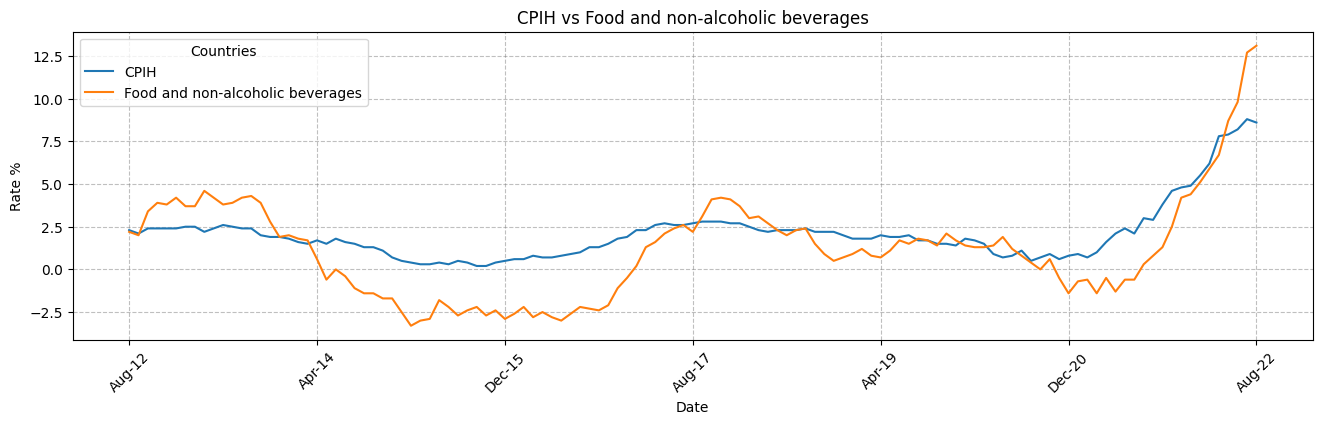

In [286]:
fig, ax = plt.subplots(figsize=(16,4))
cpih_and_foods.plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Rate %")
ax.set_title('CPIH vs Food and non-alcoholic beverages')
ax.legend(title="Countries")
plt.grid(True, linestyle='--', alpha=0.5, color='grey')
plt.xticks(rotation=45)
plt.show()

### Rise in Food and Non-Alcoholic Beverage Prices

In August 2022, prices for food and non-alcoholic beverages surged by 13.1% over the previous 12 months, a noticeable increase from the 12.7% recorded in July. Notably, the annual rate for this category was in the negative territory at minus 0.6% in July 2021, but it has been on a consistent upward trajectory for 13 consecutive months. The current rate stands as the highest recorded since August 2008.

**Annual Inflation Rates - CPIH, and Food and Non-Alcoholic Beverages**

The boost in the annual rate between July and August 2022 was attributed to price fluctuations in various detailed subcategories. The most significant upward effect was observed in milk, cheese, and eggs, where the prices of milk and cheese between July and August 2022 increased significantly compared to the same period a year ago.

**Overall Price Trends**

Throughout 2022, prices for food and non-alcoholic beverages have shown a consistent upward trend. The 1.5% increase in prices between July and August 2022 marked the most substantial rise from July to August since 1995 when a constructed series for food and non-alcoholic beverages reported a 1.6% increase.


### **References:**
- [Office for National Statistics (ONS)](https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/consumerpriceinflation/september2023)
- [Investopedia - Consumer Price Index (CPI)](https://www.investopedia.com/terms/c/consumerpriceindex.asp)
- [Investopedia - Harmonized Index of Consumer Prices (HICP)](https://www.investopedia.com/terms/h/hicp.asp)
- [HM Treasury Blog - Measures of Price Inflation: RPI, CPI, and CPIH](https://actuaries.blog.gov.uk/2021/08/23/measures-of-price-inflation-rpi-cpi-and-cpih/)


#### Github: https://github.com/AnalyticalHarry

#### YouTube: https://www.youtube.com/@AnalyticalHarry